In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import Normalizer

import keras
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras import regularizers

import MyKNN as myknn
from Get_Data import get_data_tabular

### Load Dataset 1

In [2]:
X_train, Y_train, X_test, Y_test = get_data_tabular()

### Pre-processing

In [3]:
scaler = Normalizer().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fit MyKNN Model

Text(0.5, 0, 'Value of k')

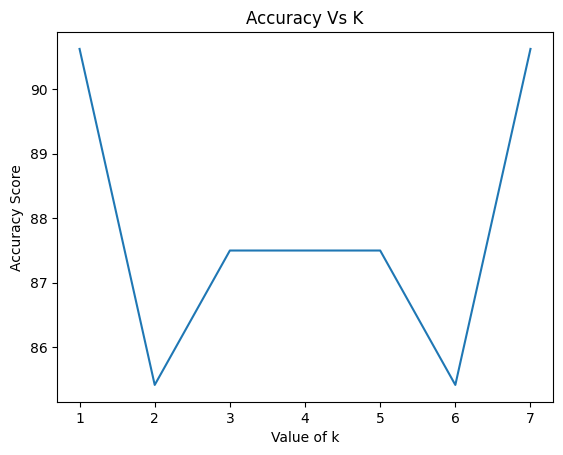

In [4]:
k = list(range(1,8))
accuracy = []
for i in k:
    Y_pred = myknn.knn_model(X_train_scaled, X_test_scaled, Y_train.to_numpy(), i)
    accuracy.append(myknn.calc_accuracy(Y_pred, Y_test.to_numpy()))
plt.plot(k, accuracy)
plt.title("Accuracy Vs K")
plt.ylabel("Accuracy Score")
plt.xlabel("Value of k")

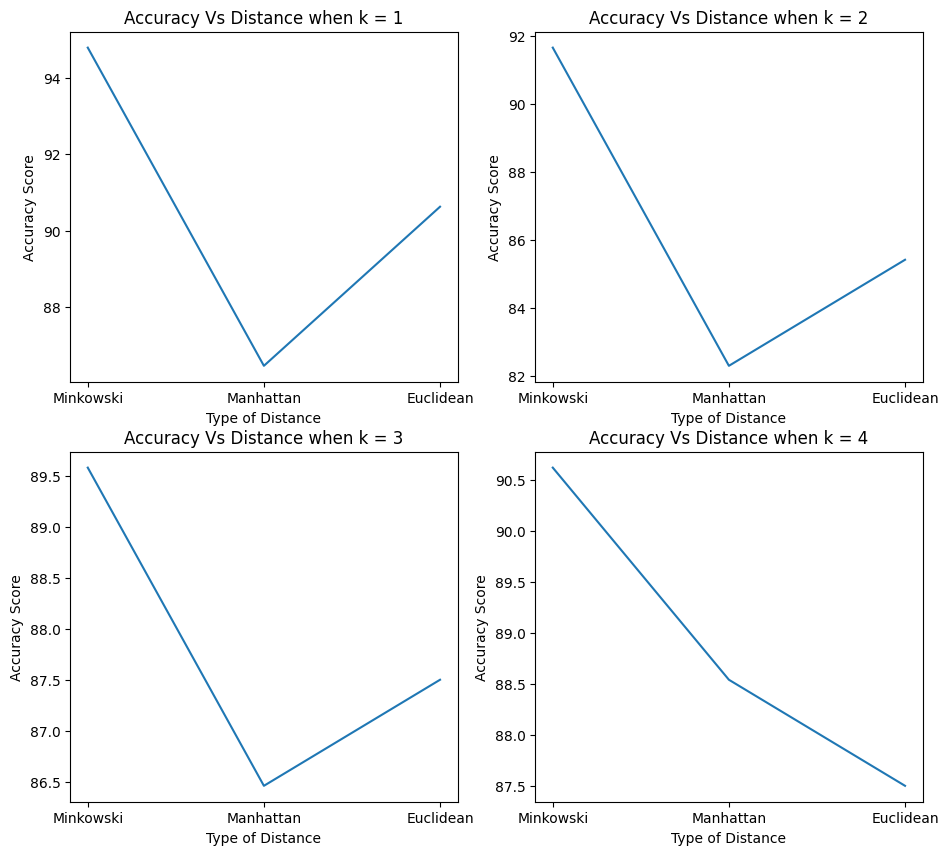

In [5]:
dist_type = ["Minkowski", "Manhattan", "Euclidean"]
accuracy = []
plt.figure(figsize=(11, 10))
for i in range(1,5):
    for d in dist_type:
        Y_pred = myknn.knn_model(X_train_scaled, X_test_scaled, Y_train.to_numpy(), i, d)
        accuracy.append(myknn.calc_accuracy(Y_pred, Y_test.to_numpy()))
    ax = plt.subplot(2, 2, i)
    ax.plot(dist_type, accuracy)
    ax.set_title('Accuracy Vs Distance when k = {}'.format(i))
    ax.set_ylabel("Accuracy Score")
    ax.set_xlabel("Type of Distance")
    accuracy = []

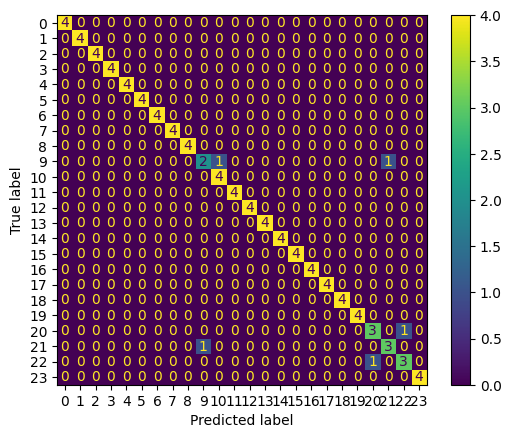

In [6]:
Y_pred = myknn.knn_model(X_train_scaled, X_test_scaled, Y_train.to_numpy(), 1, "Minkowski")
confusion_matrix = metrics.confusion_matrix(Y_test.to_numpy(), Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

#### Fit Sklearn KNN

In [7]:
accuracy = []
for i in k:
    knn_sk = KNeighborsClassifier(n_neighbors=i)
    knn_sk.fit(X_train_scaled,Y_train)
    y_pred_sk = knn_sk.predict(X_test_scaled)
    accuracy.append(metrics.accuracy_score(Y_test, y_pred_sk)*100)

Text(0.5, 0, 'Value of k')

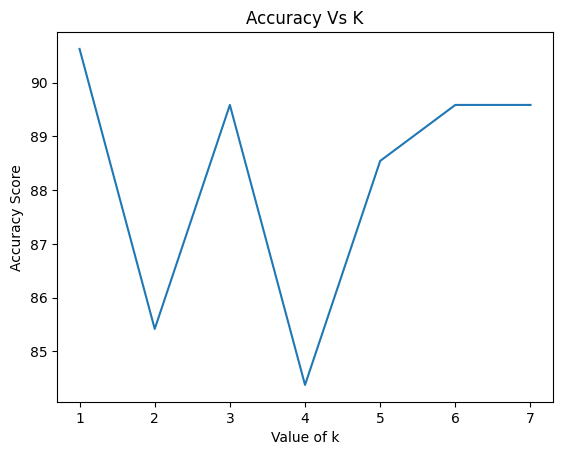

In [8]:
plt.plot(k, accuracy)
plt.title("Accuracy Vs K")
plt.ylabel("Accuracy Score")
plt.xlabel("Value of k")

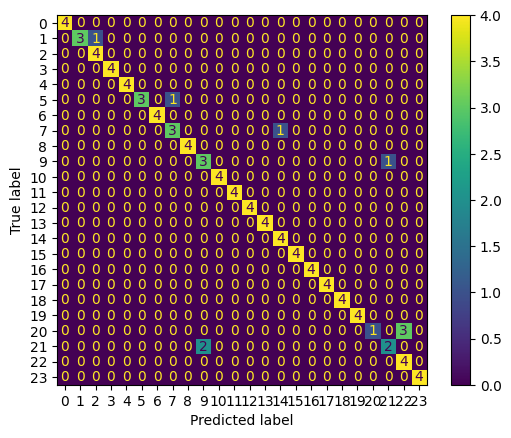

In [9]:
knn_sk = KNeighborsClassifier(n_neighbors=1)
knn_sk.fit(X_train_scaled,Y_train.to_numpy())
y_pred_sk = knn_sk.predict(X_test_scaled)
confusion_matrix = metrics.confusion_matrix(Y_test.to_numpy(), y_pred_sk)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

### Fit Dense Neural Network

In [10]:
X, Y, X_test, Y_test = get_data_tabular()

In [11]:
Y = to_categorical(Y, num_classes=25)

In [12]:
Y_test = to_categorical(Y_test, num_classes=25)

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)

In [14]:
scaler = Normalizer().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [15]:
input_dim = X_train.shape[1]  # Number of input features

model = keras.Sequential()
model.add(Dense(256, input_dim=input_dim, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1024, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(25, activation='softmax'))  # Output layer for 24 classes

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(X_train_scaled, Y_train, epochs=25, batch_size=16, validation_data=(X_val_scaled, Y_val))

Epoch 1/25
12/12 [==============================] - 2s 34ms/step - loss: 3.2833 - accuracy: 0.0365 - val_loss: 3.2666 - val_accuracy: 0.0417
Epoch 2/25
12/12 [==============================] - 0s 6ms/step - loss: 3.1660 - accuracy: 0.1406 - val_loss: 3.2500 - val_accuracy: 0.1875
Epoch 3/25
12/12 [==============================] - 0s 5ms/step - loss: 3.0300 - accuracy: 0.1354 - val_loss: 3.2242 - val_accuracy: 0.1250
Epoch 4/25
12/12 [==============================] - 0s 5ms/step - loss: 2.8063 - accuracy: 0.2448 - val_loss: 3.1698 - val_accuracy: 0.3750
Epoch 5/25
12/12 [==============================] - 0s 5ms/step - loss: 2.5524 - accuracy: 0.2708 - val_loss: 3.1000 - val_accuracy: 0.3750
Epoch 6/25
12/12 [==============================] - 0s 5ms/step - loss: 2.3125 - accuracy: 0.3698 - val_loss: 3.0331 - val_accuracy: 0.4167
Epoch 7/25
12/12 [==============================] - 0s 5ms/step - loss: 2.0372 - accuracy: 0.4740 - val_loss: 2.9357 - val_accuracy: 0.5000
Epoch 8/25
12/12 [=

In [18]:
model.evaluate(X_test_scaled, Y_test)

3/3 [==============================] - 0s 9ms/step - loss: 1.2236 - accuracy: 0.7188


[1.2235561609268188, 0.71875]

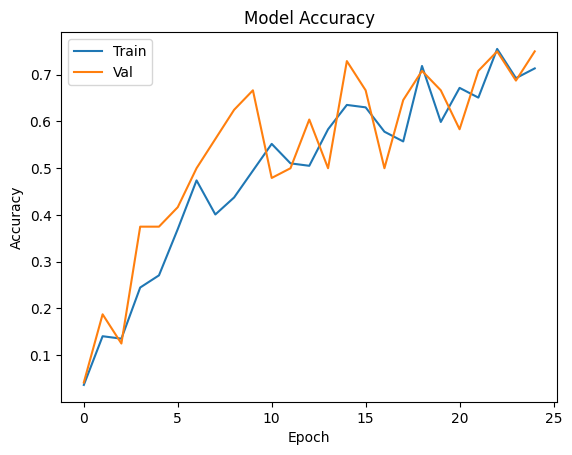

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()